In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from tsfresh import extract_features
from tsfresh.utilities.dataframe_functions import roll_time_series
from sklearn.ensemble import AdaBoostRegressor

/Users/max/Documents/tsfresh/venv/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


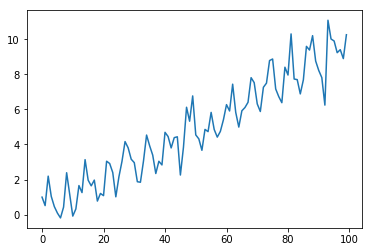

In [2]:
x = np.arange(100)*0.1 + np.sin(30*np.pi*np.linspace(0, 1, 100)) + np.random.normal(scale=0.7,size=100)

plt.plot(x)
plt.show()

In [3]:
df = pd.DataFrame({"id" : ["stock_apple"]*100, "day": range(100), "val": x, "kind": ["price"]*100})
df.head()

,day,id,kind,val
0,0,stock_apple,price,0.995796
1,1,stock_apple,price,0.512965
2,2,stock_apple,price,2.192922
3,3,stock_apple,price,1.037095
4,4,stock_apple,price,0.456787


In [9]:
df_shift = roll_time_series(df, 
                            column_id="id", column_sort="day", column_kind="kind",
                            rolling_direction=-1, maximum_number_of_timeshifts=10)
print(df.shape); print(df_shift.shape)

(100, 4)
(1045, 4)


In [10]:
df_shift.head()

,day,val,id,kind
0,10.0,-0.085506,"id=stock_apple, shift=-10",price
1,11.0,0.323591,"id=stock_apple, shift=-10",price
2,12.0,1.655566,"id=stock_apple, shift=-10",price
3,13.0,1.255071,"id=stock_apple, shift=-10",price
4,14.0,3.133547,"id=stock_apple, shift=-10",price


In [11]:
df_shift.shape

(1045, 4)

In [12]:
df_shift

,day,val,id,kind
0,10.0,-0.085506,"id=stock_apple, shift=-10",price
1,11.0,0.323591,"id=stock_apple, shift=-10",price
2,12.0,1.655566,"id=stock_apple, shift=-10",price
3,13.0,1.255071,"id=stock_apple, shift=-10",price
4,14.0,3.133547,"id=stock_apple, shift=-10",price
5,15.0,1.962829,"id=stock_apple, shift=-10",price
6,16.0,1.640404,"id=stock_apple, shift=-10",price
7,17.0,1.967614,"id=stock_apple, shift=-10",price
8,18.0,0.771155,"id=stock_apple, shift=-10",price
9,19.0,1.206282,"id=stock_apple, shift=-10",price
